In [1]:
import numpy as np 
import pandas as pd
import math
# import itertools
# import warnings
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("../input/data-analytics-ue20cs312/train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [3]:
df.shape

(1655, 6)

In [4]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,1655.000000,1655.000000,1655.000000,1655.000000,1.655000e+03
mean,1854.826157,1870.274538,1840.560036,1855.569511,3.346129e+07
std,537.945756,543.761197,532.191764,537.712649,1.459129e+07
min,1090.360000,1106.850000,1071.790000,1087.520000,7.298300e+06
25%,1377.775000,1386.505000,1371.790000,1378.395000,2.453330e+07
50%,1699.260000,1714.270000,1687.490000,1701.650000,2.980690e+07
75%,2335.090000,2365.015000,2313.790000,2344.515000,3.790005e+07
max,2954.700000,2965.760000,2926.220000,2941.900000,1.276869e+08


In [6]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

There are no NA values in this dataset.

In [7]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

There are no NULL values in this dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1655 non-null   object 
 1   Open    1655 non-null   float64
 2   High    1655 non-null   float64
 3   Low     1655 non-null   float64
 4   Close   1655 non-null   float64
 5   Volume  1655 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 77.7+ KB


Since the given dataset is clean, we can proceed to do our Exploratory Data Analysis.

In [9]:
df.set_index('Date')

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900
...,...,...,...,...,...
2022-07-25,2412.25,2429.44,2387.41,2402.95,29106300
2022-07-26,2289.29,2307.08,2255.66,2280.27,48503400
2022-07-27,2309.14,2404.25,2296.82,2395.54,43790900


Setting the "Date" column as the index for the dataset.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

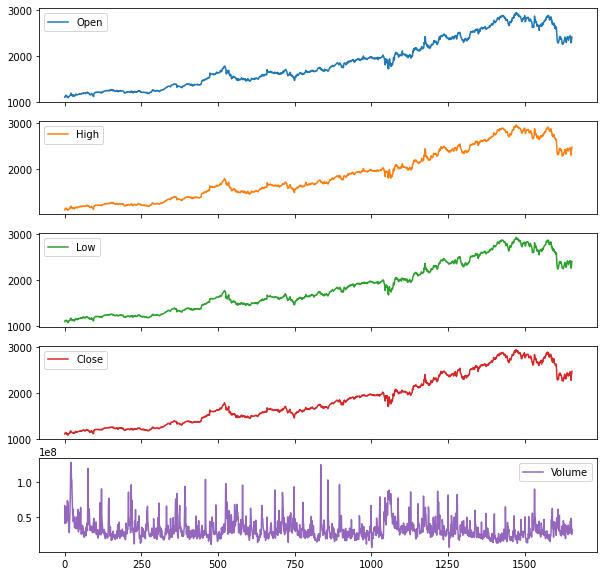

In [10]:
df.plot(subplots=True, figsize = (10,10))

Plotting the graphs for all the columns in the dataset.
As we can see, 4 of the columns are very similar.
Only the "Volume" column is distinct.

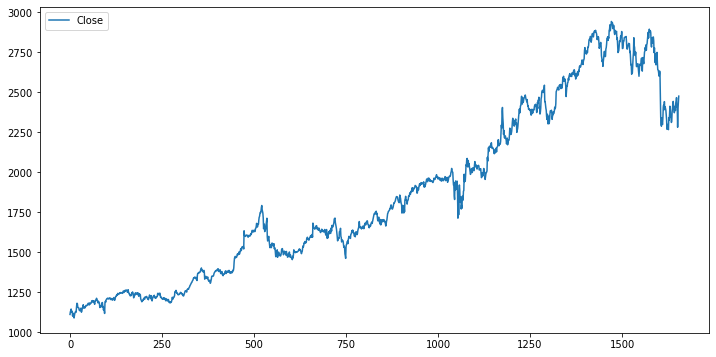

In [11]:
df['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

Historical view of the closing price of the stocks.
As we can see, there is a steady increasing trend of stock prices.

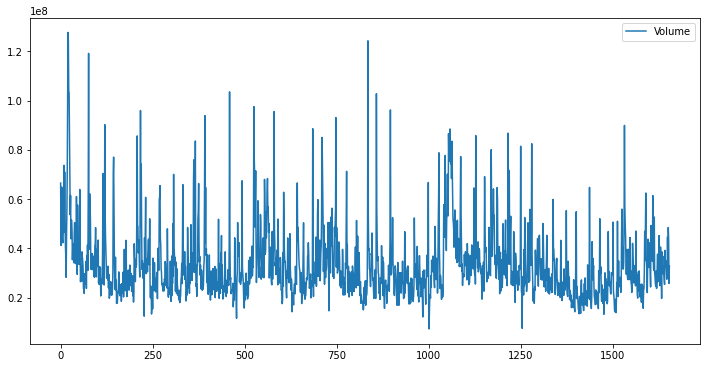

In [12]:
df['Volume'].plot(legend=True, figsize = (12, 6))
plt.show()

Plot of the total volume of stock being traded each day.
As we can see, there is a lot of variation here.

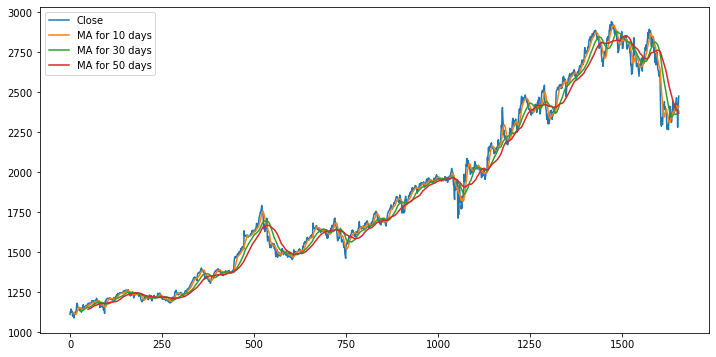

In [13]:
df_new=pd.DataFrame()
df_new['Close']=df['Close']
ma_day = [10,30,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df_new[column_name]=pd.DataFrame.rolling(df_new['Close'],ma).mean()

df_new[['Close','MA for 10 days','MA for 30 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

Plotting all the additional moving averages.
As we can see, the moving average acts as a pretty accurate model for stock price prediction.

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

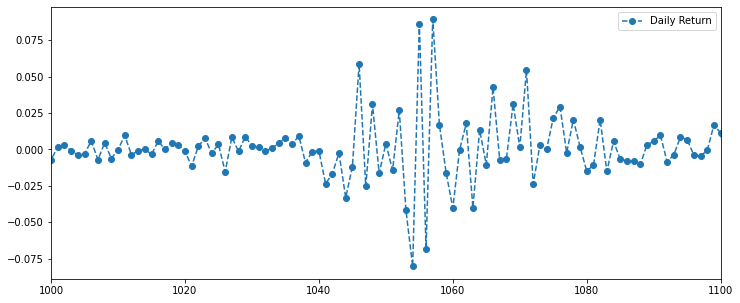

In [14]:
df_new['Daily Return'] = df['Close'].pct_change()
df_new['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.xlim(1000,1100)
plt.show()

Here, we have retrieved the daily returns for the stock for a particular period.
As we can see, there is a lot of variation in the daily returns.

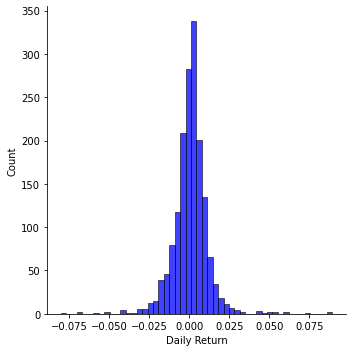

In [15]:
sns.displot(df_new['Daily Return'].dropna(),bins=50,color='blue')
plt.show()

Here, we can see the daily returns of all the stocks.
As we can see, the daily returns of stocks follow a normal distribution.
Hence, meaning negligible short term profit.

Text(0.5, 1.0, 'Cumulative Returns')

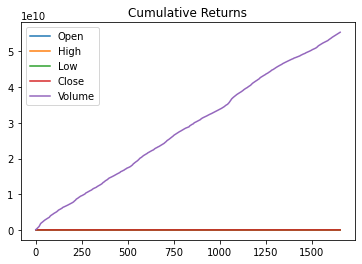

In [16]:
dr = df.cumsum()
dr.plot()
plt.title('Cumulative Returns')

Plot of the cumulative returns of the stocks.
We can see that the cumulative returns of stocks are very promising.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

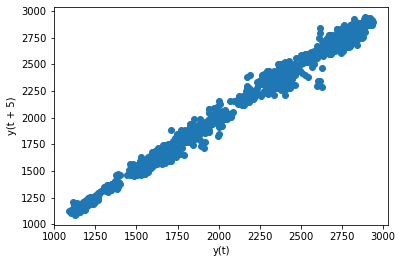

In [17]:
lag_plot(df['Close'], lag=5)

The lag plot of the closing price of stocks.
Basically the difference between stock values at a difference of 5 days(lag=5).
We can see that the stock is steadily increasing in price.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

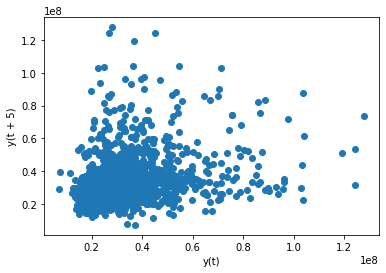

In [18]:
lag_plot(df['Volume'], lag=5)

Lag plot of the total volume of stocks traded in a day.

<AxesSubplot:>

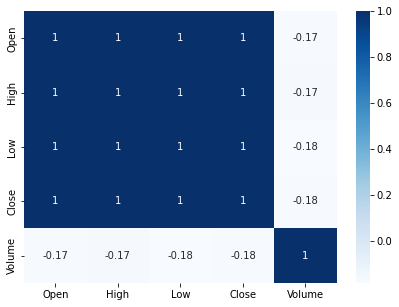

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

From the above heatmap, you can see a large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in stock market this small value is what makes the difference. So, we add new variables to our dataset that represents the difference between those values.

In [20]:
df_new=pd.DataFrame()
df_new['open-high'] = df['Open']-df['High']
df_new['open-low'] = df['Open'] - df['Low']
df_new['close-high'] = df['Close']-df['High']
df_new['close-low'] = df['Close'] - df['Low']
df_new['high-low'] = df['High'] - df['Low']
df_new['open-close'] = df['Open'] - df['Close']
df_new.head()

,open-high,open-low,close-high,close-low,high-low,open-close
0,-11.16,5.74,-1.11,15.79,16.90,-10.05
1,-13.10,4.72,-4.72,13.10,17.82,-8.38
2,-22.05,0.53,-5.64,16.94,22.58,-16.41
3,-27.76,4.44,-6.39,25.81,32.20,-21.37
4,-4.32,24.71,-27.08,1.95,29.03,22.76


We have added 6 new entries to our dataset.

<AxesSubplot:>

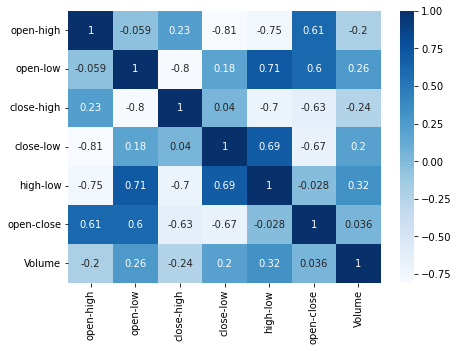

In [21]:
df_new['Volume']=df['Volume']
plt.figure(figsize=(7,5))
sns.heatmap(df_new.corr(),cmap='Blues',annot=True)

This heatmap is much more informative.
Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.

<AxesSubplot:xlabel='open-close', ylabel='Volume'>

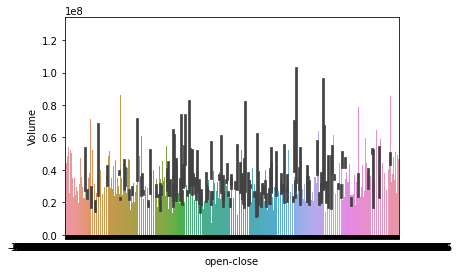

In [22]:
df_new['Volume']=df['Volume']
sns.barplot(data=df_new, x = "open-close", y="Volume")

From the above graph, we can see that there is low correlation between volume of a stock and the difference between the opening and closing price of the stock.

<AxesSubplot:xlabel='high-low', ylabel='Volume'>

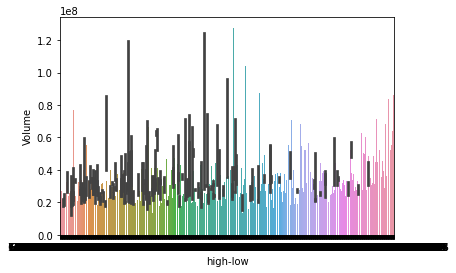

In [23]:
sns.barplot(data=df_new, x = "high-low", y="Volume")

From the above graph you can observe the volume of stocks traded is high for smaller values of high-low.

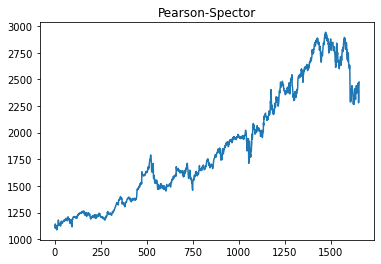

In [24]:
df = df[['Close']].copy()
df['Close'].plot()
plt.title('Pearson-Spector')
plt.show()

To check if the time series has a trend or seasonalilty component, we will perform augmented dickey fuller test on the dataset.

In [25]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-Value: {result[1]}")

ADF Statistic: -0.9614899611479585
p-Value: 0.7670496443787552


Since p-value not less than 0.05 we can't reject null hypothesis.
The data is non stationary.

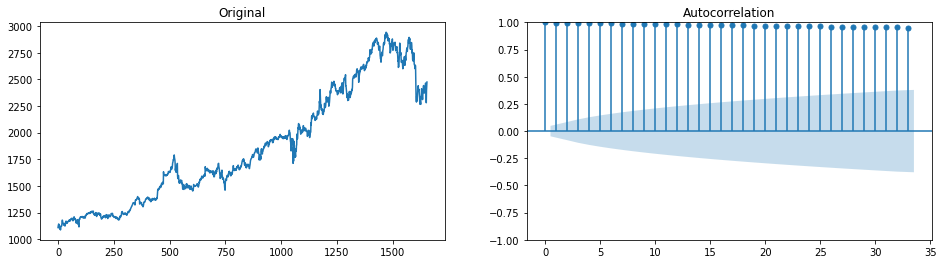

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close);
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

As we can see from the graph and autocorrelation plot above, the data is non-stationary. To make it stationary, we will perform differencing.

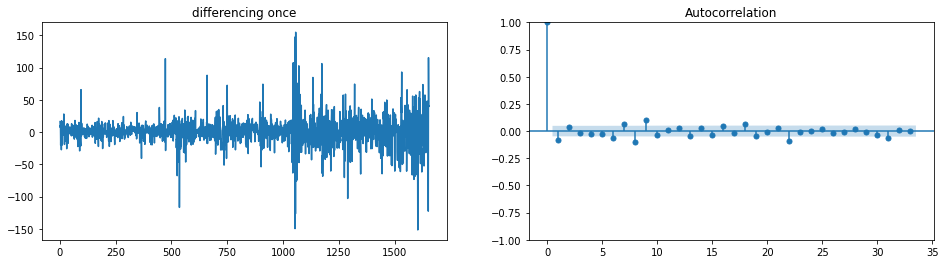

In [27]:
diff_1 = df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff_1);
ax1.set_title("differencing once")
plot_acf(diff_1,ax=ax2);

This seems good but just for confirmation, we will perform differencing of lag 2.

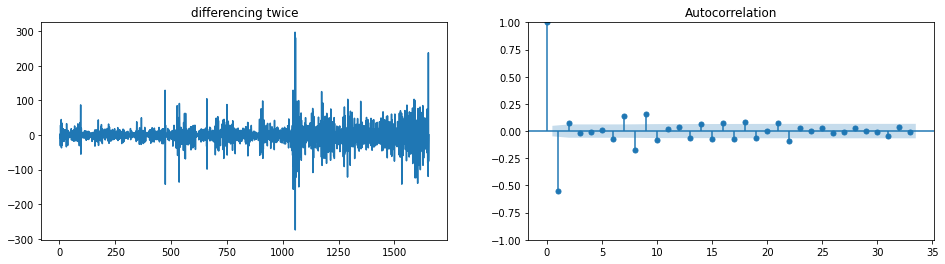

In [28]:
diff_2 = df.Close.diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff_2);
ax1.set_title("differencing twice")
plot_acf(diff_2,ax=ax2);

As we can see from the autocorrelation plot, overdifferencing has occurred.
Hence, we shall retain and use the dataset after differencing with lag 1.

Now, we can proceed to build the model. Since it is originally non-stationary, we can consider ARIMA. But since it has a significant seasonality component and other factors can also affect it, the best model choice would be SARIMAX.

In [29]:
# p = d = q = range(0, 2)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

Since we dont know the values of the paramters of the SARIMAX model, we have generated all the possible combinations of values for the parameters order and seasonal order.

In [30]:
# warnings.filterwarnings("ignore") 
# for x in pdq:
#     for y in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(df,trend='n',order=x,seasonal_order=y)
#             result = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(x, y, result.aic))
#         except:
#             continue

Now, we iterate through each possibility and get its AIC value. The lesser the AIC  value, the better. We find the combination with the least AIC value and proceed to build our model using that.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62279D+00    |proj g|=  1.25898D+00


 This problem is unconstrained.



At iterate    5    f=  4.62271D+00    |proj g|=  3.56446D-01

At iterate   10    f=  4.62150D+00    |proj g|=  4.97092D+00

At iterate   15    f=  4.59961D+00    |proj g|=  3.53885D+00

At iterate   20    f=  4.59916D+00    |proj g|=  1.73739D-01

At iterate   25    f=  4.59916D+00    |proj g|=  5.86612D-01

At iterate   30    f=  4.59873D+00    |proj g|=  8.15474D+00

At iterate   35    f=  4.58265D+00    |proj g|=  4.61386D+00

At iterate   40    f=  4.51515D+00    |proj g|=  1.47948D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   45    f=  4.50685D+00    |proj g|=  3.25221D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     68      1     0     0   3.252D-01   4.507D+00
  F =   4.5068453433467734     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


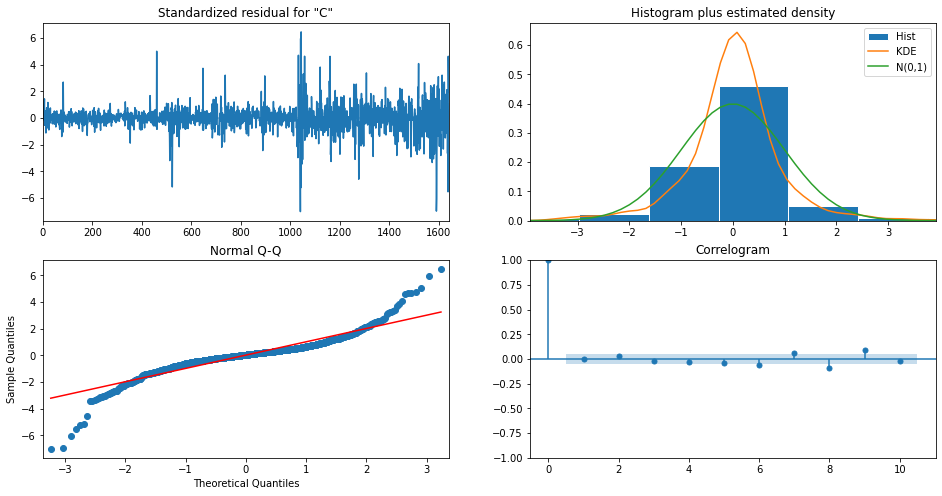

In [31]:
df_test=pd.read_csv("../input/data-analytics-ue20cs312/test.csv")
model = sm.tsa.SARIMAX(df['Close'],trend='t',order=(1, 1, 0),seasonal_order=(0, 1, 1, 12))
result = model.fit()
result.plot_diagnostics(figsize=(16, 8))
plt.show()
sarimax = result.predict(start=len(df)+1,end= len(df)+len(df_test))
df1 = pd.DataFrame(df_test['Date'],columns=['Date'])
df2 = sarimax.to_frame().set_index(df_test.index)
df2.rename(columns = {'predicted_mean':'Close'}, inplace = True)
final_2 = df1.join(df2)

We have built a model using the training dataset and made predictions based on the testing dataset. 

In [32]:
sarimax_predicted = result.predict(start=0, end=1000)
rmse_sarimax = math.sqrt(mean_squared_error(df[1:1002],sarimax_predicted))
print("The root mean squared error is {}.".format(rmse_sarimax))
final_2.to_csv("submission.csv", index=False)

The root mean squared error is 43.60188025398971.


We calculate the RMSE value for our predictions v/s the actual closing prices.
It turns out to be around 43%.